In [1]:
import numpy as np
import os
import cv2 as cv
import tensorflow as tf
from tensorflow import keras

In [2]:
data_dir='train'

In [3]:
dataset=keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    )

Found 1200 files belonging to 4 classes.


In [4]:
class_names=dataset.class_names
class_names

['Dark', 'Green', 'Light', 'Medium']

In [5]:
# data visulaization

In [7]:
import matplotlib.pyplot as plt

(32, 224, 224, 3) tf.Tensor([1 1 0 2 3 0 3 0 1 2 3 0 2 2 0 2 2 3 2 3 2 0 2 1 2 0 3 0 3 1 3 1], shape=(32,), dtype=int32)


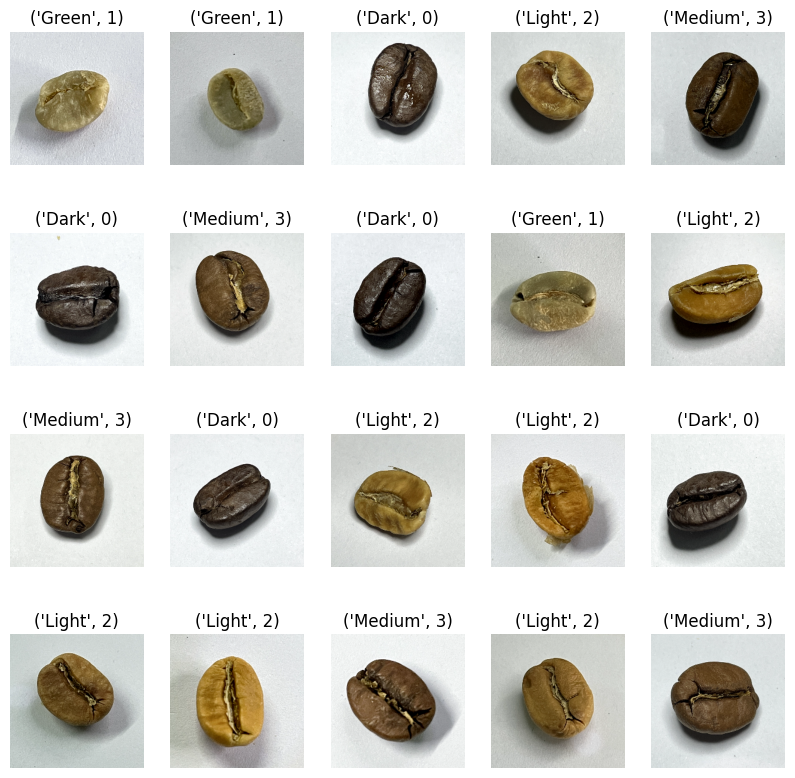

In [23]:
plt.figure(figsize=(10,10))
for image,labels in dataset.take(1):
    print(image.shape,labels)
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(f'{class_names[labels[i]],labels[i].numpy()}')
    

In [12]:
type(image[i].numpy())

numpy.ndarray

In [21]:
labels[0].numpy()

1

In [24]:
from tqdm import tqdm

In [25]:
# now get the test data
test_dir='test'

In [31]:
x_for_test=[]
y_for_test=[]

for label in class_names:
    print(f'\t\t\t\t{label}')
    index=class_names.index(label)
    for img in tqdm(os.listdir(os.path.join(test_dir,label))):
        img_path=os.path.join(test_dir,label,img)
        x_for_test.append(cv.imread(img_path))
        y_for_test.append(index)
        

				Dark


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 483.26it/s]


				Green


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 482.79it/s]


				Light


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 470.88it/s]


				Medium


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 428.85it/s]


In [32]:
x_for_test=np.array(x_for_test)
y_for_test=np.array(y_for_test)
x_for_test

array([[[[230, 230, 223],
         [232, 233, 226],
         [232, 233, 226],
         ...,
         [238, 238, 233],
         [232, 232, 227],
         [239, 239, 234]],

        [[231, 231, 225],
         [231, 232, 225],
         [232, 232, 225],
         ...,
         [241, 240, 236],
         [238, 238, 233],
         [236, 235, 231]],

        [[235, 235, 228],
         [237, 237, 230],
         [233, 234, 227],
         ...,
         [241, 240, 235],
         [244, 243, 239],
         [236, 235, 231]],

        ...,

        [[209, 207, 200],
         [211, 209, 203],
         [215, 212, 206],
         ...,
         [202, 202, 195],
         [193, 193, 186],
         [186, 186, 179]],

        [[208, 206, 199],
         [211, 209, 202],
         [207, 207, 200],
         ...,
         [195, 195, 188],
         [193, 193, 186],
         [187, 187, 180]],

        [[206, 204, 198],
         [207, 204, 198],
         [216, 214, 207],
         ...,
         [188, 188, 181],
        

In [33]:
resize_layer=keras.Sequential([
    keras.layers.Rescaling(1.0/255)
])

In [35]:
data_augmentation=keras.models.Sequential()
data_augmentation.add(keras.layers.RandomRotation(0.2))
data_augmentation.add(keras.layers.RandomFlip())

In [36]:
model=keras.Sequential()
model.add(resize_layer)
model.add(data_augmentation)
model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,224,224,3)))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
# model.add(keras.layers.Conv2D(16,(3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(4,activation='softmax'))

In [37]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
model.build(input_shape=(32,224,224,3))

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_test,x_val,y_test,y_val=train_test_split(x_for_test,y_for_test,test_size=0.5)

In [41]:
model.fit(dataset,epochs=5,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/5
38/38 [==============================] - 120s 3s/step - loss: 1.1840 - accuracy: 0.5858 - val_loss: 15.6502 - val_accuracy: 0.2300
Epoch 2/5
38/38 [==============================] - 111s 3s/step - loss: 0.2287 - accuracy: 0.9275 - val_loss: 11.3200 - val_accuracy: 0.2300
Epoch 3/5
38/38 [==============================] - 109s 3s/step - loss: 0.1272 - accuracy: 0.9583 - val_loss: 17.6292 - val_accuracy: 0.2300
Epoch 4/5
38/38 [==============================] - 109s 3s/step - loss: 0.1397 - accuracy: 0.9450 - val_loss: 21.6233 - val_accuracy: 0.2300
Epoch 5/5
38/38 [==============================] - 109s 3s/step - loss: 0.1627 - accuracy: 0.9492 - val_loss: 27.9563 - val_accuracy: 0.2300


In [44]:
# Validation accuracy is coming so less because we didnt gave it in batch size dimensions

In [45]:
test_dataset=keras.preprocessing.image_dataset_from_directory(
    test_dir,
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    )

Found 400 files belonging to 4 classes.


In [46]:
test_dataset.class_names

['Dark', 'Green', 'Light', 'Medium']

In [47]:
# now we can test on our model as the dimension has increased

In [48]:
model.evaluate(test_dataset)

13/13 [==============================] - 9s 572ms/step - loss: 0.0775 - accuracy: 0.9750


[0.07751575857400894, 0.9750000238418579]

In [49]:
model.save('coffee_beans.keras')

In [53]:
import pickle
pickle.dump(class_names,open('coffee_classes.pickle','wb'))

In [54]:
def give_predictions(y_p):
    p=np.argmax(y_p[0])
    return class_names[p]
    

1/1 [==============================] - 0s 47ms/step


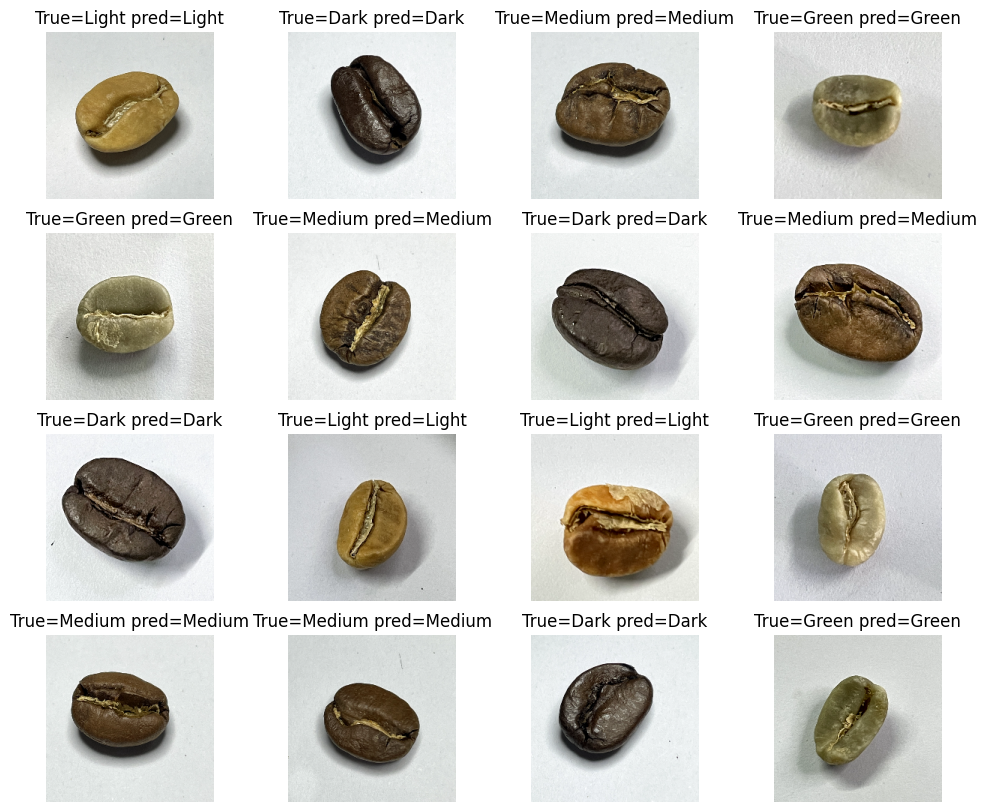

In [64]:
# now we will visualize the predictions
plt.figure(figsize=(12,10))
for image,labels in test_dataset.take(1):
    for i in range(16):
        plt.subplot(4,4,i+1)
        im=image[i].numpy().astype('uint8')
        plt.imshow(im)
        lab=give_predictions(model.predict(np.expand_dims(im,0)))
        plt.title(f'True={lab} pred={class_names[labels[i].numpy()]}')
        
        plt.axis('off')
    